In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/raw/train.csv')

In [3]:
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [5]:
df_train, df_val = train_test_split(data, test_size=0.02, random_state=42)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176000 entries, 686615 to 121958
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1176000 non-null  int64  
 1   Age                   1157661 non-null  float64
 2   Gender                1176000 non-null  object 
 3   Annual Income         1131924 non-null  float64
 4   Marital Status        1157828 non-null  object 
 5   Number of Dependents  1068456 non-null  float64
 6   Education Level       1176000 non-null  object 
 7   Occupation            825022 non-null   object 
 8   Health Score          1103316 non-null  float64
 9   Location              1176000 non-null  object 
 10  Policy Type           1176000 non-null  object 
 11  Previous Claims       819205 non-null   float64
 12  Vehicle Age           1175994 non-null  float64
 13  Credit Score          1040899 non-null  float64
 14  Insurance Duration    1175999 non-n

In [7]:
df_train['Age'].value_counts(normalize=True)

Age
53.0    0.022302
61.0    0.022211
39.0    0.022029
64.0    0.022006
43.0    0.021986
57.0    0.021973
62.0    0.021880
46.0    0.021821
33.0    0.021791
47.0    0.021783
44.0    0.021703
34.0    0.021693
58.0    0.021640
31.0    0.021568
32.0    0.021544
56.0    0.021541
54.0    0.021487
35.0    0.021472
36.0    0.021448
38.0    0.021436
22.0    0.021434
37.0    0.021313
51.0    0.021307
59.0    0.021292
55.0    0.021276
49.0    0.021262
45.0    0.021245
20.0    0.021201
21.0    0.021144
50.0    0.021122
40.0    0.021050
48.0    0.021019
26.0    0.020998
24.0    0.020907
30.0    0.020898
29.0    0.020871
19.0    0.020850
60.0    0.020849
42.0    0.020840
52.0    0.020820
18.0    0.020706
28.0    0.020684
63.0    0.020527
25.0    0.020503
27.0    0.020483
41.0    0.020420
23.0    0.019666
Name: proportion, dtype: float64

In [8]:
missing_age = df_train['Age'].isnull().sum()
missing_age

np.int64(18339)

In [9]:
missing_age * 100 / len(df_train)

np.float64(1.5594387755102042)

In [10]:
df_train.loc[df_train['Age'].notnull(), 'Premium Amount'].mean()

np.float64(1102.7856229068786)

In [11]:
df_train.loc[df_train['Age'].isnull(), 'Premium Amount'].mean()

np.float64(1095.9575222204046)

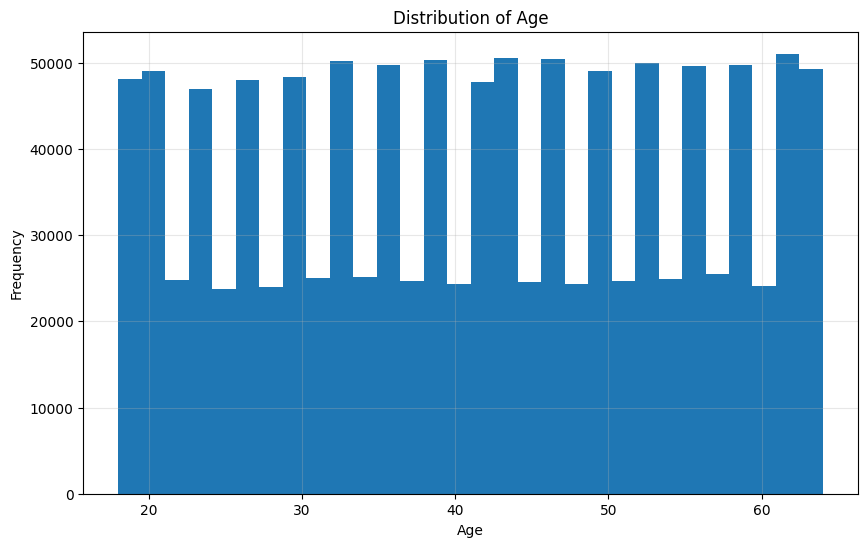

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['Age'].dropna(), bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
df_train['Age'].median()

np.float64(41.0)

In [14]:
df_train['Age'].mean()

np.float64(41.147169162647785)

In [15]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

In [16]:
df_train['Age'].isna().sum()

np.int64(0)

In [17]:
df_train['Marital Status'].value_counts(normalize=True)

Marital Status
Single      0.334692
Married     0.333719
Divorced    0.331589
Name: proportion, dtype: float64

In [18]:
df_train.groupby('Marital Status')['Premium Amount'].mean().sort_values()

Marital Status
Married     1100.391233
Divorced    1100.498788
Single      1101.775968
Name: Premium Amount, dtype: float64

In [19]:
df_train.loc[df_train['Marital Status'].isnull(), 'Premium Amount'].mean()

np.float64(1216.6515518379924)

In [20]:
df_train['Marital Status'].isna().sum() / len(df_train)

np.float64(0.015452380952380952)

In [21]:
df_train['Marital Status Msising'] = df_train['Marital Status'].isnull().astype(int)

In [22]:
df_train = df_train.drop('Marital Status', axis=1)

In [23]:
df_train.isna().sum()

id                             0
Age                            0
Gender                         0
Annual Income              44076
Number of Dependents      107544
Education Level                0
Occupation                350978
Health Score               72684
Location                       0
Policy Type                    0
Previous Claims           356795
Vehicle Age                    6
Credit Score              135101
Insurance Duration             1
Policy Start Date              0
Customer Feedback          76195
Smoking Status                 0
Exercise Frequency             0
Property Type                  0
Premium Amount                 0
Marital Status Msising         0
dtype: int64

In [24]:
df_train['Customer Feedback'].value_counts(normalize=True)

Customer Feedback
Average    0.336851
Poor       0.334604
Good       0.328546
Name: proportion, dtype: float64

In [25]:
df_train.groupby('Customer Feedback')['Premium Amount'].mean().sort_values()

Customer Feedback
Average    1094.645637
Good       1096.382735
Poor       1098.877337
Name: Premium Amount, dtype: float64

In [26]:
df_train.loc[df_train['Customer Feedback'].isnull(), 'Premium Amount'].mean()

np.float64(1189.959839884507)

In [27]:
df_train['Customer Feedback'].isna().sum() / len(df_train)

np.float64(0.06479166666666666)

In [28]:
df_train[(df_train['Marital Status Msising'] == 1) & 
         (df_train['Customer Feedback'].isnull())].shape[0]

1440

In [29]:
df_train['Customer Feedback'].isna().sum()

np.int64(76195)

In [30]:
df_train['Customer Feedback Msising'] = df_train['Customer Feedback'].isnull().astype(int)

In [31]:
df_train = df_train.drop('Customer Feedback', axis=1)

In [32]:
df_train['Occupation'].isna().sum()

np.int64(350978)

In [33]:
df_train['Occupation'].isna().sum() / len(df_train)

np.float64(0.29845068027210886)

In [34]:
df_train['Occupation'].value_counts(normalize=True)

Occupation
Self-Employed    0.335757
Employed         0.335729
Unemployed       0.328514
Name: proportion, dtype: float64

In [35]:
df_train.groupby('Occupation')['Premium Amount'].mean().sort_values()

Occupation
Unemployed       1105.509484
Self-Employed    1106.980856
Employed         1107.270084
Name: Premium Amount, dtype: float64

In [36]:
df_train.loc[df_train['Occupation'].isnull(), 'Premium Amount'].mean()

np.float64(1093.4753403347217)

In [37]:
df_train['Occupation'] = df_train['Occupation'].fillna("Unknown") # we'll later drop this column to check how our model will perform

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176000 entries, 686615 to 121958
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   id                         1176000 non-null  int64  
 1   Age                        1176000 non-null  float64
 2   Gender                     1176000 non-null  object 
 3   Annual Income              1131924 non-null  float64
 4   Number of Dependents       1068456 non-null  float64
 5   Education Level            1176000 non-null  object 
 6   Occupation                 1176000 non-null  object 
 7   Health Score               1103316 non-null  float64
 8   Location                   1176000 non-null  object 
 9   Policy Type                1176000 non-null  object 
 10  Previous Claims            819205 non-null   float64
 11  Vehicle Age                1175994 non-null  float64
 12  Credit Score               1040899 non-null  float64
 13  Insurance Dur

In [39]:
df_train.isna().sum()

id                                0
Age                               0
Gender                            0
Annual Income                 44076
Number of Dependents         107544
Education Level                   0
Occupation                        0
Health Score                  72684
Location                          0
Policy Type                       0
Previous Claims              356795
Vehicle Age                       6
Credit Score                 135101
Insurance Duration                1
Policy Start Date                 0
Smoking Status                    0
Exercise Frequency                0
Property Type                     0
Premium Amount                    0
Marital Status Msising            0
Customer Feedback Msising         0
dtype: int64

In [40]:
df_train['Vehicle Age'].mean()

np.float64(9.571093049794472)

In [41]:
df_train['Vehicle Age'].median()

np.float64(10.0)

In [42]:
df_train['Vehicle Age'] = df_train['Vehicle Age'].fillna(df_train['Vehicle Age'].median())

In [43]:
income = df_train['Annual Income'].copy()

In [44]:
income.isna().sum() / len(df_train)

np.float64(0.037479591836734695)

In [45]:
income.mean()

np.float64(32746.305518745074)

In [46]:
income.median()

np.float64(23915.0)

In [47]:
income.std()

np.float64(32180.338080585352)

In [48]:
df_train.loc[income.isnull(), 'Premium Amount'].mean()

np.float64(930.6440012705327)

In [49]:
df_train.loc[income.notnull(), 'Premium Amount'].mean()

np.float64(1109.3780209625381)

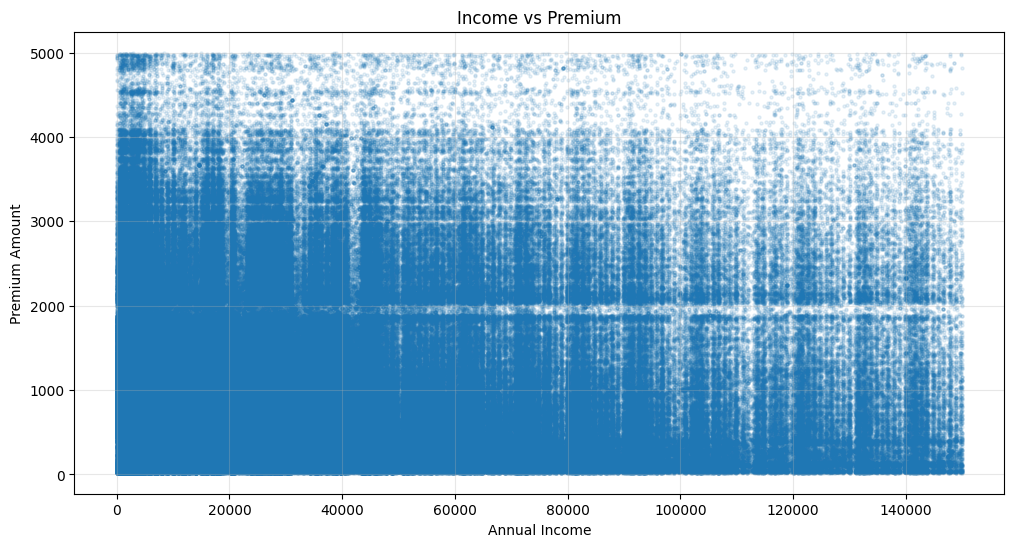

In [50]:
plt.figure(figsize=(12, 6))
plt.scatter(df_train['Annual Income'].dropna(), 
            df_train.loc[df_train['Annual Income'].notnull(), 'Premium Amount'], 
            alpha=0.1, s=5)
plt.xlabel('Annual Income')
plt.ylabel('Premium Amount')
plt.title('Income vs Premium')
plt.grid(True, alpha=0.3)
plt.show()

In [51]:
print(pd.cut(df_train.loc[df_train['Annual Income'].isnull(), 'Age'], 
             bins=[20, 30, 40, 50, 60, 70]).value_counts())

Age
(40, 50]    9776
(50, 60]    9481
(30, 40]    9382
(20, 30]    8941
(60, 70]    3674
Name: count, dtype: int64


In [52]:
customers_inrange = df_train[df_train['Premium Amount'].between(900, 960)]

In [53]:
customers_inrange['Annual Income'].median()

np.float64(20641.0)

In [54]:
df_train['Income Missing'] = df_train['Annual Income'].isnull().astype(int)

In [55]:
income_value= customers_inrange['Annual Income'].median()

In [56]:
df_train['Annual Income'] = df_train['Annual Income'].fillna(income_value)

In [57]:
df_train['Annual Income'].isna().sum()

np.int64(0)

In [58]:
def get_info(df, col_name):
    col = df[col_name]
    print("Missing values" + str(col.isna().sum()))
    print("percent " + str(col.isna().sum() / len(df_train)))
    print(f"Mean {col.mean()}")
    print(f"Median {col.median()}")
    print(f"str {col.std()}")

    print(f"missing data: {df.loc[col.isnull(), 'Premium Amount'].mean()}")
    print(f"not missing data {df.loc[col.notnull(), 'Premium Amount'].mean()}")

In [59]:
get_info(df_train, 'Number of Dependents')

Missing values107544
percent 0.09144897959183673
Mean 2.0094725473019013
Median 2.0
str 1.4173038268749105
missing data: 1126.2842650450048
not missing data 1100.3032010677089


In [60]:
df_train['Number of Dependents'] = df_train['Number of Dependents'].fillna(df_train['Number of Dependents'].median())

In [61]:
get_info(df_train, 'Health Score')

Missing values72684
percent 0.061806122448979595
Mean 25.616621924437187
Median 24.58243552295604
str 12.203138064583012
missing data: 1157.6785812558471
not missing data 1099.0559023887988


In [62]:
df_train['Health Score Missing'] = df_train['Health Score'].isnull().astype(int) 
df_train['Health Score'] = df_train['Health Score'].fillna(df_train['Health Score'].median())

In [63]:
get_info(df_train, 'Previous Claims')

Missing values356795
percent 0.30339710884353743
Mean 1.002969952575973
Median 1.0
str 0.9829167706039065
missing data: 1077.192530724926
not missing data 1113.7795338163219


In [64]:
df_train['Previous Claims'] = df_train['Previous Claims'].fillna(df_train['Previous Claims'].median())

In [65]:
get_info(df_train, 'Credit Score')

Missing values135101
percent 0.11488180272108843
Mean 592.9386328548687
Median 595.0
str 149.98241922944248
missing data: 1086.0395629936122
not missing data 1104.8388373896025


In [66]:
df_train['Credit Score'] = df_train['Credit Score'].fillna(df_train['Credit Score'].median())

In [67]:
df_train.isna().sum()

id                           0
Age                          0
Gender                       0
Annual Income                0
Number of Dependents         0
Education Level              0
Occupation                   0
Health Score                 0
Location                     0
Policy Type                  0
Previous Claims              0
Vehicle Age                  0
Credit Score                 0
Insurance Duration           1
Policy Start Date            0
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
Marital Status Msising       0
Customer Feedback Msising    0
Income Missing               0
Health Score Missing         0
dtype: int64

In [68]:
get_info(df_train, 'Insurance Duration')

Missing values1
percent 8.503401360544218e-07
Mean 5.017725355208635
Median 5.0
str 2.594407082471965
missing data: 1044.0
not missing data 1102.6791927544157


In [69]:
df_train['Insurance Duration'] = df_train['Insurance Duration'].fillna(df_train['Insurance Duration'].median())

In [70]:
df_train.isna().sum()

id                           0
Age                          0
Gender                       0
Annual Income                0
Number of Dependents         0
Education Level              0
Occupation                   0
Health Score                 0
Location                     0
Policy Type                  0
Previous Claims              0
Vehicle Age                  0
Credit Score                 0
Insurance Duration           0
Policy Start Date            0
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
Marital Status Msising       0
Customer Feedback Msising    0
Income Missing               0
Health Score Missing         0
dtype: int64

In [71]:
df_train = df_train.drop('id', axis=1)

In [72]:
df_train['Policy Start Date'] = pd.to_datetime(df_train['Policy Start Date'].str.split().str[0])

In [73]:
with pd.option_context('display.max_columns', None, 'display.expand_frame_repr', False):
    print(df_train.head().T)

                                       686615               94342                1112384              622925               284068 
Age                                       24.0                 43.0                 22.0                 63.0                 34.0
Gender                                    Male               Female                 Male                 Male                 Male
Annual Income                          26121.0              57763.0              37188.0               2887.0              45904.0
Number of Dependents                       4.0                  4.0                  4.0                  2.0                  2.0
Education Level                    High School          High School             Master's                  PhD                  PhD
Occupation                       Self-Employed             Employed              Unknown             Employed        Self-Employed
Health Score                         19.265837             44.13361            13.0

In [74]:
df_train['Policy Start Date'] = df_train['Policy Start Date'].dt.date

In [75]:
df_train['Income Per Dependent'] = df_train['Annual Income'] / (df_train['Number of Dependents'] + 1)

In [76]:
df_train.groupby('Number of Dependents')['Income Per Dependent'].mean().sort_values()

Number of Dependents
4.0     6468.500001
3.0     8059.825552
2.0    10825.867680
1.0    16089.524727
0.0    32132.553918
Name: Income Per Dependent, dtype: float64

In [77]:
df_train['Income Per Dependent'].corr(df_train['Premium Amount'])

np.float64(-0.008351233988828952)

In [78]:
df_train = df_train.drop('Income Per Dependent', axis=1)

In [79]:
df_train['Age'].corr(df_train['Health Score'])

np.float64(0.0007911554787654162)

In [80]:
age_health = df_train['Health Score'] / df_train['Age']

In [81]:
age_health.corr(df_train['Premium Amount'])

np.float64(0.011497850650690807)

In [82]:
df_train['Smoking Status'] = (df_train['Smoking Status'] == 'Yes').astype(int)

In [83]:
age_smoke = df_train['Smoking Status'] * df_train['Age']

In [84]:
age_smoke.corr(df_train['Premium Amount'])

np.float64(-0.0009469184059682344)

In [85]:
df_train['Age'].corr(df_train['Premium Amount'])

np.float64(-0.0024363895386009457)

In [86]:
df_train['Exercise Frequency'].value_counts()

Exercise Frequency
Weekly     300084
Monthly    293830
Rarely     293476
Daily      288610
Name: count, dtype: int64

In [87]:
exercise_map = {'Rarely': 0, 'Monthly': 1, 'Weekly': 2, 'Daily': 3}
df_train['Exercise Frequency'] = df_train['Exercise Frequency'].map(exercise_map)

In [88]:
df_train['Exercise Frequency'].value_counts()

Exercise Frequency
2    300084
1    293830
0    293476
3    288610
Name: count, dtype: int64

In [89]:
df_train.columns

Index(['Age', 'Gender', 'Annual Income', 'Number of Dependents',
       'Education Level', 'Occupation', 'Health Score', 'Location',
       'Policy Type', 'Previous Claims', 'Vehicle Age', 'Credit Score',
       'Insurance Duration', 'Policy Start Date', 'Smoking Status',
       'Exercise Frequency', 'Property Type', 'Premium Amount',
       'Marital Status Msising', 'Customer Feedback Msising', 'Income Missing',
       'Health Score Missing'],
      dtype='object')

In [90]:
df_train['Education Level'].value_counts()

Education Level
Master's       297694
PhD            297524
Bachelor's     297114
High School    283668
Name: count, dtype: int64

In [91]:
education_map = {'High School': 0, 'Bachelor\'s': 1, 'Master\'s': 2, 'PhD': 3}
df_train['Education Level'] = df_train['Education Level'].map(education_map)

In [92]:
df_train['Education Level'].value_counts()

Education Level
2    297694
3    297524
1    297114
0    283668
Name: count, dtype: int64

In [93]:
with pd.option_context('display.max_columns', None, 'display.expand_frame_repr', False):
    print(df_train.head().T)

                                 686615         94342       1112384     622925         284068 
Age                                 24.0           43.0        22.0        63.0           34.0
Gender                              Male         Female        Male        Male           Male
Annual Income                    26121.0        57763.0     37188.0      2887.0        45904.0
Number of Dependents                 4.0            4.0         4.0         2.0            2.0
Education Level                        0              0           2           3              3
Occupation                 Self-Employed       Employed     Unknown    Employed  Self-Employed
Health Score                   19.265837       44.13361   13.087227   11.414833       21.36004
Location                        Suburban       Suburban    Suburban       Rural          Urban
Policy Type                        Basic  Comprehensive       Basic       Basic          Basic
Previous Claims                      1.0          

In [94]:
df_train['Policy Type'].value_counts()

Policy Type
Premium          393760
Comprehensive    391635
Basic            390605
Name: count, dtype: int64

In [95]:
print(df_train.groupby('Policy Type')['Premium Amount'].mean().sort_values())

Policy Type
Premium          1101.551016
Comprehensive    1102.990838
Basic            1103.503865
Name: Premium Amount, dtype: float64


In [96]:
# df_train = pd.get_dummies(df_train, columns=['Policy Type', 'Occupation', 'Location', 'Property Type'])

In [97]:
# 'Policy Type' in df_train.columns

In [98]:
df_train['Gender Female'] = (df_train['Gender'] == 'Female').astype(int)

In [99]:
df_train = df_train.drop('Gender', axis=1)

In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176000 entries, 686615 to 121958
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Age                        1176000 non-null  float64
 1   Annual Income              1176000 non-null  float64
 2   Number of Dependents       1176000 non-null  float64
 3   Education Level            1176000 non-null  int64  
 4   Occupation                 1176000 non-null  object 
 5   Health Score               1176000 non-null  float64
 6   Location                   1176000 non-null  object 
 7   Policy Type                1176000 non-null  object 
 8   Previous Claims            1176000 non-null  float64
 9   Vehicle Age                1176000 non-null  float64
 10  Credit Score               1176000 non-null  float64
 11  Insurance Duration         1176000 non-null  float64
 12  Policy Start Date          1176000 non-null  object 
 13  Smoking Statu

In [101]:
df_train['Policy Start Date'] = pd.to_datetime(df_train['Policy Start Date'])

In [102]:
df_train['Policy Start Date'].dtype

dtype('<M8[ns]')

In [103]:
df_train['Policy Year'] = df_train['Policy Start Date'].dt.year
df_train['Policy Month'] = df_train['Policy Start Date'].dt.month
df_train['Policy Quarter'] = df_train['Policy Start Date'].dt.quarter
df_train = df_train.drop('Policy Start Date', axis=1)

In [104]:
df_train['Policy Year'].max() - df_train['Policy Year'].min()

np.int32(5)

In [105]:
Q1 = df_train['Premium Amount'].quantile(0.25)
Q3 = df_train['Premium Amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_train[(df_train['Premium Amount'] < (Q1 - 1.5*IQR)) | 
                    (df_train['Premium Amount'] > (Q3 + 1.5*IQR))]

In [106]:
outliers

,Age,Annual Income,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,...,Property Type,Premium Amount,Marital Status Msising,Customer Feedback Msising,Income Missing,Health Score Missing,Gender Female,Policy Year,Policy Month,Policy Quarter
1028939,63.0,92414.0,1.0,1,Unknown,9.555419,Suburban,Basic,1.0,9.0,...,Condo,3080.0,0,0,0,0,0,2019,8,3
1142060,59.0,5916.0,1.0,1,Unknown,24.067678,Suburban,Basic,1.0,17.0,...,House,3446.0,0,0,0,0,1,2024,6,2
1088580,41.0,22069.0,2.0,2,Unemployed,28.980026,Suburban,Basic,0.0,18.0,...,Condo,3528.0,1,0,0,0,0,2021,8,3
1190496,28.0,46481.0,2.0,0,Unknown,12.996889,Urban,Basic,2.0,1.0,...,Condo,3524.0,0,0,0,0,1,2020,5,2
140252,48.0,56545.0,1.0,2,Employed,16.837417,Suburban,Comprehensive,1.0,19.0,...,Apartment,3328.0,0,0,0,0,0,2022,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046797,28.0,20641.0,2.0,1,Unemployed,24.582436,Urban,Comprehensive,2.0,8.0,...,Apartment,3379.0,0,0,1,1,0,2021,10,4
489492,52.0,10046.0,2.0,3,Self-Employed,38.244902,Rural,Premium,0.0,13.0,...,Apartment,3535.0,0,0,0,0,1,2023,7,3
527035,40.0,145969.0,1.0,3,Self-Employed,22.842154,Suburban,Basic,4.0,18.0,...,Condo,3096.0,0,0,0,0,0,2023,6,2
486232,56.0,123399.0,2.0,1,Self-Employed,6.384424,Urban,Premium,0.0,5.0,...,Condo,3611.0,0,0,0,0,1,2020,11,4


In [107]:
X_train = df_train.drop('Premium Amount', axis=1)
y_train = df_train['Premium Amount']

In [108]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Age', 'Annual Income', 'Health Score', 'Credit Score', 
                'Vehicle Age', 'Insurance Duration']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

In [109]:
X_train.head()

,Age,Annual Income,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,...,Exercise Frequency,Property Type,Marital Status Msising,Customer Feedback Msising,Income Missing,Health Score Missing,Gender Female,Policy Year,Policy Month,Policy Quarter
686615,-1.276303,-0.194964,4.0,0,Self-Employed,-0.531766,Suburban,Basic,1.0,-0.271992,...,3,Condo,0,0,0,0,0,2023,6,2
94342,0.138100,0.804622,4.0,0,Employed,1.571639,Suburban,Comprehensive,1.0,-0.791360,...,2,Condo,0,0,0,0,1,2020,7,3
1112384,-1.425187,0.154648,4.0,2,Unknown,-1.054374,Suburban,Basic,1.0,-0.445115,...,3,House,0,0,0,0,0,2019,11,4
622925,1.626945,-0.928937,2.0,3,Employed,-1.195831,Rural,Basic,1.0,-0.271992,...,2,Apartment,0,0,0,0,0,2023,5,2
284068,-0.531880,0.429990,2.0,3,Self-Employed,-0.354630,Urban,Basic,0.0,-1.310728,...,3,Condo,0,0,0,0,0,2022,4,2


In [110]:
df_val.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
372605,372605,52.0,Female,5538.0,Married,NaN,Master's,Employed,8.093145,Rural,...,0.0,18.0,497.0,3.0,2020-02-10 15:21:39.274993,Average,No,Weekly,Apartment,2742.0
551204,551204,60.0,Female,39711.0,Married,4.0,Bachelor's,Employed,NaN,Suburban,...,0.0,3.0,340.0,3.0,2020-10-16 15:21:39.097737,Poor,No,Weekly,Apartment,1347.0
240320,240320,58.0,Female,2364.0,Married,2.0,Bachelor's,NaN,34.452482,Urban,...,2.0,19.0,NaN,7.0,2021-01-02 15:21:39.126661,Poor,No,Monthly,House,2196.0
1047361,1047361,39.0,Male,9094.0,Divorced,0.0,Bachelor's,NaN,26.241661,Rural,...,1.0,17.0,761.0,5.0,2022-05-11 15:21:39.134960,Poor,Yes,Rarely,Condo,684.0
555362,555362,47.0,Male,43189.0,Divorced,NaN,PhD,NaN,26.691921,Suburban,...,1.0,4.0,319.0,4.0,2020-07-28 15:21:39.181605,Poor,Yes,Weekly,Apartment,1714.0


In [111]:
df_val.isna().sum()

id                         0
Age                      366
Gender                     0
Annual Income            873
Marital Status           357
Number of Dependents    2128
Education Level            0
Occupation              7097
Health Score            1392
Location                   0
Policy Type                0
Previous Claims         7234
Vehicle Age                0
Credit Score            2781
Insurance Duration         0
Policy Start Date          0
Customer Feedback       1629
Smoking Status             0
Exercise Frequency         0
Property Type              0
Premium Amount             0
dtype: int64

In [112]:
df_train['Age'].median()

np.float64(41.0)

In [113]:
df_val['Age'] = df_val['Age'].fillna(df_train['Age'].median())

In [114]:
df_val['Marital Status Msising'] = df_val['Marital Status'].isnull().astype(int)

In [115]:
df_val = df_val.drop('Marital Status', axis=1)

In [116]:
df_val['Customer Feedback Msising'] = df_val['Customer Feedback'].isnull().astype(int)

In [117]:
df_val = df_val.drop('Customer Feedback', axis=1)

In [118]:
df_val['Occupation'] = df_val['Occupation'].fillna("Unknown")

In [119]:
df_val.isna().sum()

id                              0
Age                             0
Gender                          0
Annual Income                 873
Number of Dependents         2128
Education Level                 0
Occupation                      0
Health Score                 1392
Location                        0
Policy Type                     0
Previous Claims              7234
Vehicle Age                     0
Credit Score                 2781
Insurance Duration              0
Policy Start Date               0
Smoking Status                  0
Exercise Frequency              0
Property Type                   0
Premium Amount                  0
Marital Status Msising          0
Customer Feedback Msising       0
dtype: int64

In [120]:
df_val['Income Missing'] = df_val['Annual Income'].isnull().astype(int)

In [121]:
df_val['Annual Income'] = df_val['Annual Income'].fillna(income_value)

In [122]:
df_train['Number of Dependents'].median()

np.float64(2.0)

In [123]:
df_val['Number of Dependents'] = df_val['Number of Dependents'].fillna(df_train['Number of Dependents'].median())

In [124]:
df_val['Health Score Missing'] = df_val['Health Score'].isnull().astype(int) 

In [125]:
df_val['Health Score'] = df_val['Health Score'].fillna(df_train['Health Score'].median())

In [126]:
df_val['Previous Claims'] = df_val['Previous Claims'].fillna(df_train['Previous Claims'].median())

In [127]:
df_val['Credit Score'] = df_val['Credit Score'].fillna(df_train['Credit Score'].median())

In [128]:
df_val.isna().sum()

id                           0
Age                          0
Gender                       0
Annual Income                0
Number of Dependents         0
Education Level              0
Occupation                   0
Health Score                 0
Location                     0
Policy Type                  0
Previous Claims              0
Vehicle Age                  0
Credit Score                 0
Insurance Duration           0
Policy Start Date            0
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
Marital Status Msising       0
Customer Feedback Msising    0
Income Missing               0
Health Score Missing         0
dtype: int64

In [129]:
df_val.isna().sum().sum()

np.int64(0)

In [130]:
df_val = df_val.drop('id', axis=1)

In [131]:
df_val['Policy Start Date']

372605     2020-02-10 15:21:39.274993
551204     2020-10-16 15:21:39.097737
240320     2021-01-02 15:21:39.126661
1047361    2022-05-11 15:21:39.134960
555362     2020-07-28 15:21:39.181605
                      ...            
455695     2021-02-13 15:21:39.237118
23804      2022-01-22 15:21:39.237118
564447     2020-08-25 15:21:39.132191
1171450    2024-06-01 15:21:39.194829
1013580    2021-04-04 15:21:39.198406
Name: Policy Start Date, Length: 24000, dtype: object

In [132]:
df_val['Policy Start Date'] = pd.to_datetime(df_val['Policy Start Date'])
df_val['Policy Year'] = df_val['Policy Start Date'].dt.year
df_val['Policy Month'] = df_val['Policy Start Date'].dt.month
df_val['Policy Quarter'] = df_val['Policy Start Date'].dt.quarter
df_val = df_val.drop('Policy Start Date', axis=1)

In [133]:
exercise_map = {'Rarely': 0, 'Monthly': 1, 'Weekly': 2, 'Daily': 3}
df_val['Exercise Frequency'] = df_val['Exercise Frequency'].map(exercise_map)

In [134]:
education_map = {'High School': 0, 'Bachelor\'s': 1, 'Master\'s': 2, 'PhD': 3}
df_val['Education Level'] = df_val['Education Level'].map(education_map)

In [135]:
df_val['Smoking Status'] = (df_val['Smoking Status'] == 'Yes').astype(int)

In [136]:
df_val['Gender Female'] = (df_val['Gender'] == 'Female').astype(int)
df_val = df_val.drop('Gender', axis=1)

In [137]:
X_val = df_val.drop('Premium Amount', axis=1)
y_val = df_val['Premium Amount']

In [138]:
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

In [139]:
X_train.head()

,Age,Annual Income,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,...,Exercise Frequency,Property Type,Marital Status Msising,Customer Feedback Msising,Income Missing,Health Score Missing,Gender Female,Policy Year,Policy Month,Policy Quarter
686615,-1.276303,-0.194964,4.0,0,Self-Employed,-0.531766,Suburban,Basic,1.0,-0.271992,...,3,Condo,0,0,0,0,0,2023,6,2
94342,0.138100,0.804622,4.0,0,Employed,1.571639,Suburban,Comprehensive,1.0,-0.791360,...,2,Condo,0,0,0,0,1,2020,7,3
1112384,-1.425187,0.154648,4.0,2,Unknown,-1.054374,Suburban,Basic,1.0,-0.445115,...,3,House,0,0,0,0,0,2019,11,4
622925,1.626945,-0.928937,2.0,3,Employed,-1.195831,Rural,Basic,1.0,-0.271992,...,2,Apartment,0,0,0,0,0,2023,5,2
284068,-0.531880,0.429990,2.0,3,Self-Employed,-0.354630,Urban,Basic,0.0,-1.310728,...,3,Condo,0,0,0,0,0,2022,4,2


In [140]:
X_val.head()

,Age,Annual Income,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,...,Exercise Frequency,Property Type,Marital Status Msising,Customer Feedback Msising,Income Missing,Health Score Missing,Policy Year,Policy Month,Policy Quarter,Gender Female
372605,0.808080,-0.845190,2.0,2,Employed,-1.476792,Rural,Basic,0.0,1.459234,...,2,Apartment,0,0,0,0,2020,2,1,1
551204,1.403618,0.234351,4.0,1,Employed,-0.082069,Suburban,Comprehensive,0.0,-1.137605,...,2,Apartment,0,0,0,1,2020,10,4,1
240320,1.254733,-0.945458,2.0,1,Unknown,0.752775,Urban,Comprehensive,2.0,1.632356,...,1,House,0,0,0,0,2021,1,1,1
1047361,-0.159669,-0.732855,0.0,1,Unknown,0.058275,Rural,Basic,1.0,1.286111,...,0,Condo,0,0,0,0,2022,5,2,0
555362,0.435869,0.344222,2.0,3,Unknown,0.096359,Suburban,Comprehensive,1.0,-0.964482,...,2,Apartment,0,0,0,0,2020,7,3,0


In [141]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176000 entries, 686615 to 121958
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Age                        1176000 non-null  float64
 1   Annual Income              1176000 non-null  float64
 2   Number of Dependents       1176000 non-null  float64
 3   Education Level            1176000 non-null  int64  
 4   Occupation                 1176000 non-null  object 
 5   Health Score               1176000 non-null  float64
 6   Location                   1176000 non-null  object 
 7   Policy Type                1176000 non-null  object 
 8   Previous Claims            1176000 non-null  float64
 9   Vehicle Age                1176000 non-null  float64
 10  Credit Score               1176000 non-null  float64
 11  Insurance Duration         1176000 non-null  float64
 12  Smoking Status             1176000 non-null  int64  
 13  Exercise Freq

In [142]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Policy Type', 'Occupation', 'Location', 'Property Type']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train[categorical_cols])

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",False
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'ignore'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_cate

In [143]:
X_train_encoded = encoder.transform(X_train[categorical_cols])
X_val_encoded = encoder.transform(X_val[categorical_cols])

In [144]:
train_encoded_df = pd.DataFrame(X_train_encoded, 
                                columns=encoder.get_feature_names_out(categorical_cols),
                                index=df_train.index)
val_encoded_df = pd.DataFrame(X_val_encoded,
                              columns=encoder.get_feature_names_out(categorical_cols),
                              index=df_val.index)

In [145]:
X_train = pd.concat([X_train.drop(categorical_cols, axis=1), train_encoded_df], axis=1)
X_val = pd.concat([X_val.drop(categorical_cols, axis=1), val_encoded_df], axis=1)

In [146]:
X_train.head()

,Age,Annual Income,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,...,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Occupation_Unknown,Location_Rural,Location_Suburban,Location_Urban,Property Type_Apartment,Property Type_Condo,Property Type_House
686615,-1.276303,-0.194964,4.0,0,-0.531766,1.0,-0.271992,0.416882,0.378613,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
94342,0.138100,0.804622,4.0,0,1.571639,1.0,-0.791360,-1.418617,-1.163167,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1112384,-1.425187,0.154648,4.0,2,-1.054374,1.0,-0.445115,0.041278,-1.548612,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
622925,1.626945,-0.928937,2.0,3,-1.195831,1.0,-0.271992,0.445229,1.534947,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
284068,-0.531880,0.429990,2.0,3,-0.354630,0.0,-1.310728,1.770474,-0.006832,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [147]:
X_val.head()

,Age,Annual Income,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,...,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Occupation_Unknown,Location_Rural,Location_Suburban,Location_Urban,Property Type_Apartment,Property Type_Condo,Property Type_House
372605,0.808080,-0.845190,2.0,2,-1.476792,0.0,1.459234,-0.681583,-0.777722,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
551204,1.403618,0.234351,4.0,1,-0.082069,0.0,-1.137605,-1.794222,-0.777722,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
240320,1.254733,-0.945458,2.0,1,0.752775,2.0,1.632356,0.012930,0.764058,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1047361,-0.159669,-0.732855,0.0,1,0.058275,1.0,1.286111,1.189351,-0.006832,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
555362,0.435869,0.344222,2.0,3,0.096359,1.0,-0.964482,-1.943046,-0.392277,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [148]:
X_train.columns = X_train.columns.str.replace(' ', '_').str.replace('/', '_')
X_val.columns = X_val.columns.str.replace(' ', '_').str.replace('/', '_')

In [149]:
X_train.head()

,Age,Annual_Income,Number_of_Dependents,Education_Level,Health_Score,Previous_Claims,Vehicle_Age,Credit_Score,Insurance_Duration,Smoking_Status,...,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Occupation_Unknown,Location_Rural,Location_Suburban,Location_Urban,Property_Type_Apartment,Property_Type_Condo,Property_Type_House
686615,-1.276303,-0.194964,4.0,0,-0.531766,1.0,-0.271992,0.416882,0.378613,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
94342,0.138100,0.804622,4.0,0,1.571639,1.0,-0.791360,-1.418617,-1.163167,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1112384,-1.425187,0.154648,4.0,2,-1.054374,1.0,-0.445115,0.041278,-1.548612,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
622925,1.626945,-0.928937,2.0,3,-1.195831,1.0,-0.271992,0.445229,1.534947,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
284068,-0.531880,0.429990,2.0,3,-0.354630,0.0,-1.310728,1.770474,-0.006832,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [150]:
X_val.head()

,Age,Annual_Income,Number_of_Dependents,Education_Level,Health_Score,Previous_Claims,Vehicle_Age,Credit_Score,Insurance_Duration,Smoking_Status,...,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Occupation_Unknown,Location_Rural,Location_Suburban,Location_Urban,Property_Type_Apartment,Property_Type_Condo,Property_Type_House
372605,0.808080,-0.845190,2.0,2,-1.476792,0.0,1.459234,-0.681583,-0.777722,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
551204,1.403618,0.234351,4.0,1,-0.082069,0.0,-1.137605,-1.794222,-0.777722,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
240320,1.254733,-0.945458,2.0,1,0.752775,2.0,1.632356,0.012930,0.764058,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1047361,-0.159669,-0.732855,0.0,1,0.058275,1.0,1.286111,1.189351,-0.006832,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
555362,0.435869,0.344222,2.0,3,0.096359,1.0,-0.964482,-1.943046,-0.392277,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [157]:
X_train = X_train[X_train.columns.tolist()]

In [158]:
X_val = X_val[X_train.columns.tolist()]

In [159]:
import os
os.makedirs('../data/processed/train', exist_ok=True)
X_train.to_parquet('../data/processed/train/X.parquet', index=False, engine='pyarrow')
y_train_df = pd.DataFrame(y_train.values, columns=['Premium_Amount'])
y_train_df.to_parquet('../data/processed/train/y.parquet', index=False, engine='pyarrow')

In [160]:
os.makedirs('../data/processed/val', exist_ok=True)
X_val.to_parquet('../data/processed/val/X.parquet', index=False, engine='pyarrow')
y_val_df = pd.DataFrame(y_val.values, columns=['Premium_Amount'])
y_val_df.to_parquet('../data/processed/val/y.parquet', index=False, engine='pyarrow')

In [161]:
y_train_df.shape

(1176000, 1)

In [162]:
import pickle
os.makedirs('../utils/preprocess', exist_ok=True)

with open('../utils/preprocess/onehot_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

with open('../utils/preprocess/standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)